# Capítulo 3 - Classificação

In [1]:
# warning imports
import warnings
warnings.filterwarnings("ignore") 

## 3.1 Carregamento e análise dos dados

Para estudar o método de classificação, vamos usar o conjunto de dados 'mnist_784', tal conjunto é composto de números escritos por estudantes. é interresante notar que tal conjunto de dados pode ser carregado pela função 'fetch_openml' do método sklearn.datasets.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import fetch_openml


In [3]:
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

O conjunto de dados carregado, tem a seguinte estrutura:


- 'data' contém um array com uma linha por instância e uma coluna por característica.(Cada array representa um NÚMERO)
- 'target' contém um array com os rótulos
- 'DESCR' descreve os dados.


Aqui vamos usar apenas 'data' e 'target'.


In [4]:
X, y = mnist['data'], mnist['target']


In [5]:
np.array(X.loc[0])


array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

Aqui iremos fazer um pequeno trecho de código usando 'matplotlib.pyplot' para mostrar graficamente um array.

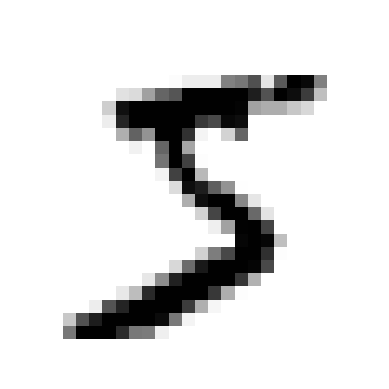

In [6]:
some_digit = np.array(X.loc[0])
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image,
           cmap='binary')

plt.axis("off")
plt.show()


Os algoritmos de ML trabalham usualmente com valores numéricos, por isso vamos usar a função 'astype' para converter o campo 'target'.


In [7]:
y = y.astype(np.uint8)


Precisamos dividir os dados em treinos e testes. O conjunto de dados 'mnist_784' já vem separado, os primeiros 60k são dados de treinos, enquanto os 10k últimos de teste. Com isso, vamos separar os dados.


In [8]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]


# Classificador binario

O que é um classificador binário ?

Ao invés de trabalhar com um algoritmo que tenta prever todos os números, inicialmente vamos estudar uma maneira de prever apenas se o número analisado é (ou não é) um número em questão. Daí o binário, pois o algoritmo retornará apenas Verdadeiro (True) ou Falso (False).
Com isso vamos escolher o número '5'. A primeira tarefa consiste em dividir nossos 'targets' em apenas 5, para que o modelo possa 'aprender' como o '5' funciona.


In [9]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)


Onde, y_train_5 e y_test_5 são série de valores booleanos ('True' ou 'False').

Para criar o modelo, vamos usar um classificador e treiná-lo. Neste caso vamos usar o 'Gradiente Descendente Estocástico' SGD.


In [10]:
# creating the model
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)

# training the model
sgd_clf.fit(X_train, y_train_5)


SGDClassifier(random_state=42)

Primeiramente vamos 'prever' uma instância onde já sabemos o resultado, com o intuito de testar o modelo.

In [11]:
sgd_clf.predict([some_digit])


array([ True])

Como esperado, o retorno foi verdadeiro.

# Cálculo de desempenho

### Validação cruzada

Divide aleatoriamente o conjunto de dados em n conjuntos (cv) e 'treina' o modelo em cada um deles de forma independente, a fim de encontrar possíveis 'erros de continuidade' no modelo.

Aqui vamos usar o cv=3.


In [12]:
from sklearn.model_selection import cross_val_score


In [13]:
scores = cross_val_score(sgd_clf,
                         X_train,
                         y_train_5,
                         cv=3,
                         scoring="accuracy"
                         )
scores

array([0.95035, 0.96035, 0.9604 ])

95%, parece algo irreal né?
Agora vamos fazer um classificador de 'não 5' e usar a validação cruzada.

In [14]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
    

In [15]:
never_5_cfl = Never5Classifier()

cross_val_score(never_5_cfl,
                X_train,
                y_train_5,
                cv=3,
                scoring="accuracy"
                )

array([0.91125, 0.90855, 0.90915])

A acurácia alta pode enganar, mas o ponto é o seguinte, boa parte do conjunto de dados é formada por não 5 (90%), então é relativamente 'fácil' a acurácia ser alta.

In [16]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf,
                                 X_train,
                                 y_train_5,
                                 cv=3)

y_train_pred 

array([ True, False, False, ...,  True, False, False])

### A Matriz de confusão


Uma outra forma de analisar o desempenho de um classificador é analisar sua matriz de confusão. A ideia é contabilizar todos os tipos de erros e acertos. Em outras palavras, quando o classificador indica uma imagem de maneira correta, ele pode ter classificado um '5' como '5'(verdadeiro positivo), ou um 'não 5' como não 'não 5' (verdadeiro negativo), porém ainda existem dois tipos de classificação, analisar um '5' como 'não 5' (falso negativo) e um 'não 5' como '5' (falso positivo).


Assim vamos usar a função 'confusion_matrix' da classe 'sklearn.metrics'.



In [17]:
from sklearn.metrics import confusion_matrix

cm_5 = confusion_matrix(y_train_5, y_train_pred)
cm_5

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [18]:
true_negative= cm_5[0][0]
false_positive = cm_5[0][1]
false_negative = cm_5[1][0]
true_positive = cm_5[1][1]

In [19]:
print('Verdadeiros negativos: {}\n'.format(true_positive) +
      'Falso positivos: {}\n'.format(false_positive) +
      'Falso negativos: {}\n'.format(false_negative) +
      'Verdadeiros positivos: {}\n'.format(true_negative))

Verdadeiros negativos: 3530
Falso positivos: 687
Falso negativos: 1891
Verdadeiros positivos: 53892



Como maneira de analisar graficamente, vamos usar a função 'heatmap' da biblioteca seaborn.

<AxesSubplot:>

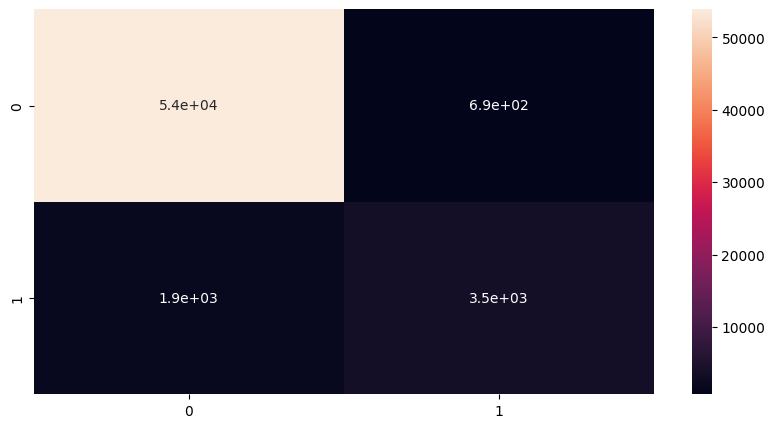

In [20]:
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.heatmap(cm_5, 
            annot=True        # colocar os valores dentro do grafico
            )


Desta forma, fica bem claro os resultados esperados estão na diagonal principal. Aqui vamos 'forçar' um resultado 'perfeito', ou seja só valores positivos.

In [21]:
cm_only_true = confusion_matrix(y_train_5, y_train_5)   # valor medido = valor previsto
cm_only_true

array([[54579,     0],
       [    0,  5421]], dtype=int64)

É interresante observar que um classificador 'perfeito' teria valores não-nulos apenas na diagonal principal.

In [22]:
print('Verdadeiros negativos: {}\n'.format(cm_only_true[0][0]) +
      'Falso positivos: {}\n'.format(cm_only_true[0][1]) +
      'Falso negativos: {}\n'.format(cm_only_true[1][0]) +
      'Verdadeiros positivos: {}\n'.format(cm_only_true[1][1]))

Verdadeiros negativos: 54579
Falso positivos: 0
Falso negativos: 0
Verdadeiros positivos: 5421



<AxesSubplot:>

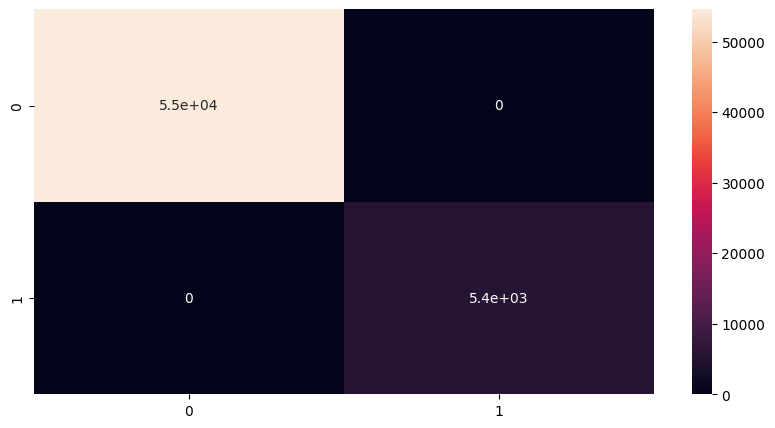

In [23]:
plt.figure(figsize=(10, 5))
sns.heatmap(cm_only_true, 
            annot=True        # colocar os valores dentro do grafico
            )


A matriz de confusão nos fornece muitas informações, mas às vezes você pode preferir uma métrica de número único.

Uma observação interessante é a precisão do modelo sobre suas previsões positivas, denominada **precision** (precisão):

\begin{equation}
precision = \frac{TP}{TP + FP}
\end{equation}

Uma maneira trivial de ter uma precision perfeita (= 1) é fazer uma previsão que você tem certeza de que está correta, por consequência FP = 0. Isso não seria útil, pois a avaliação ignora todos, exceto os verdadeiros positivos.

A precision é normalmente usada junto com outra métrica chamada **recall** (sensibilidade).

Lembre-se, também chamada de sensibilidade ou taxa de verdadeiro positivo, é a seguinte:

\begin{equation}
recall = \frac{TP}{TP + FN}
\end{equation}

### 3.3.3 Recall, Precision e F1Score



Como forma de analisar os resultados da matriz de confusão, podemos separá-los, inicialmente vamos estudar a precisão e a revocação.


In [24]:
precision = true_positive/(true_positive + false_positive)
precision   

0.8370879772350012

In [25]:
recall = true_positive/(true_positive + false_negative)
recall

0.6511713705958311

Para comparação de modelos, podemos usar a média harmonica, conhecida como F1score, ou F1, dada pela seguinte equação:

In [26]:
2/((1/precision)+(1/recall))

0.7325171197343847

A biblioteca sklearn fornece funções para calcular diretamente essas medidas:

In [27]:
from sklearn.metrics import precision_score, recall_score

print('Precision = {} \n   Recall = {}'.format(precision_score(y_train_5, y_train_pred), recall_score(y_train_5, y_train_pred)))

Precision = 0.8370879772350012 
   Recall = 0.6511713705958311


In [28]:
from sklearn.metrics import f1_score

print('F1Score = {}'.format(f1_score(y_train_5, y_train_pred)))

F1Score = 0.7325171197343846


### 3.3.4 Trade-off precisão/revocação e a curva ROC

As decisões tomadas pelo classificador são baseadas em um limiar, uma medida, que aqui vamos chamar de 'thresholds', tal medida determina se a classe em questão é, ou não é um 5. Assim sendo, a variação dessa medida determina diretamente o 'recall' e a 'precision' do modelo em questão.
Com o objetivo de visualizar o trade-off em tais variáveis, vamos visualizar os scores determinados pelo modelo, usando a sução 'cross_val_predict' da classe 'sklearn.model_selection', e usar o parametro "method='decision_function'".


In [29]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method='decision_function')
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

#### Curva precision e recall

Determinados os scores, podemos usar a função 'precision_recall_curve' para calcular os pares de 'recall' e 'precision' para diferentes 'thresholds'.

In [30]:
from sklearn.metrics import precision_recall_curve

# todos os conjuntos de precision e recalls para determinados thresholds

precision, recalls, thresholds = precision_recall_curve(y_train_5, y_scores) 

Como maneira de visualizar, vamos plotar a 'Precision' diretamente com o 'Recall'.

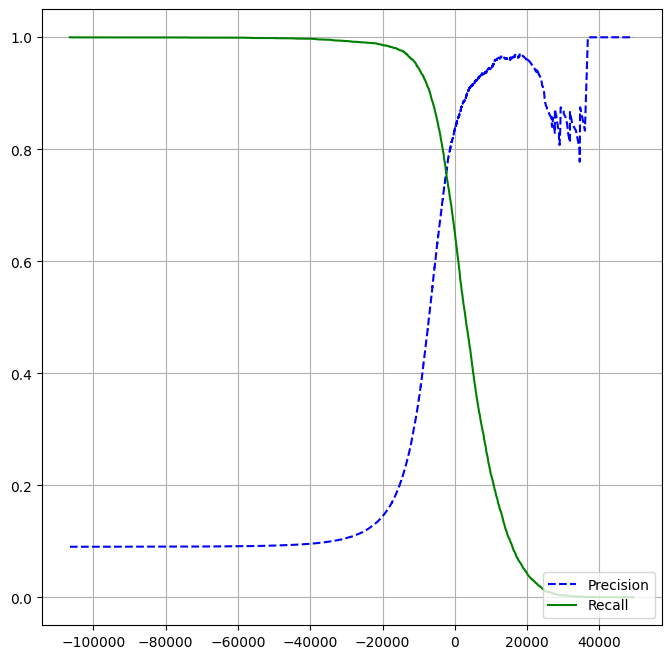

In [31]:
plt.figure(figsize=(8, 8))
plt.plot(thresholds, precision[:-1], 'b--', label='Precision')
plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')

plt.legend(loc='lower right')
plt.grid(True)
plt.show()
    

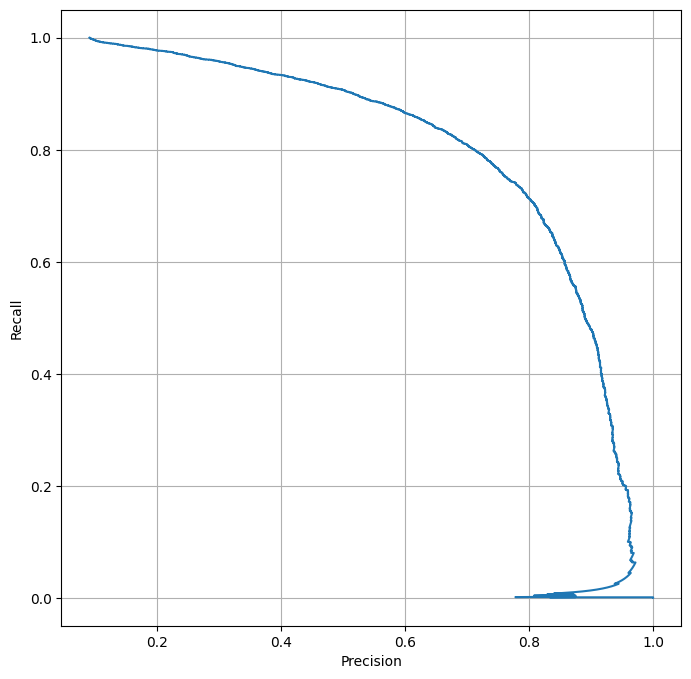

In [32]:
plt.figure(figsize=(8, 8))
plt.plot(precision[:-1], recalls[:-1])

plt.xlabel('Precision')
plt.ylabel('Recall')

plt.grid(True)
plt.show()

Em poucas palavras, é possivel cobnseguir um 'precision' expecifico, mas para isso teremos um valor de 'recall' vinculado, e vice-verso.
Para selecionar uma 'precision' expecifica vamos usar a função 'np.argmax' e selecionar a condição expecifica, aqui sera usado uma 'precision' de 90% e como resultado teremos um 'threshold' (limiar).

In [33]:
threshold_90 = thresholds[np.argmax(precision >= 0.90)]
threshold_90

3370.019499143958

Com esse 'threshold', podemos ter as 'preditions' expecificas:

In [34]:
y_pred_90 = (y_scores >= threshold_90)
y_pred_90

array([False, False, False, ...,  True, False, False])

E assim conferir o par 'precision' e 'recall':

In [35]:
print('Precision = {:.2f}\n Recall = {:.2f}'.format(precision_score(y_train_5, y_pred_90), recall_score(y_train_5, y_pred_90)))

Precision = 0.90
 Recall = 0.48


#### Curva ROC


A curva ROC, é outra ferramenta comum em classificadores binários. Muito parecida com a curva 'precision x recall', mas ao invez da plotagem dos mesmos, plotamos fpr e tpr's,


fpr = fp/(fp + tn)


tpr = tp/(tp + tn)


onde:


fpr -> False positive rate - É a proporção de instâncias negativas classificadas como positivas


tpr -> True positive rate - É a proporção de instâncias negativas classificadas corretamente (outro nome para revocação ou recall)


Da mesma maneira que na curva 'precision x recall', só que agora chamando a função 'roc_curve', vamos plotar a curva ROC,




In [36]:
# imports roc curve
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

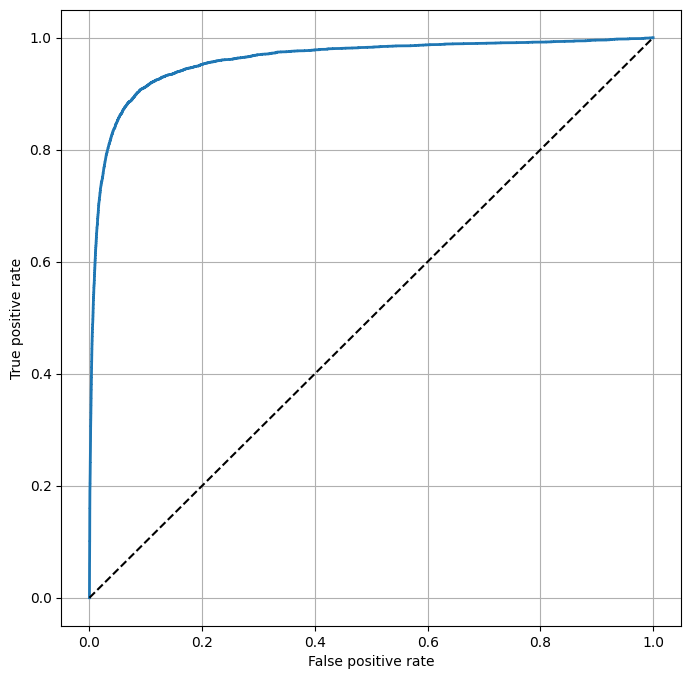

In [37]:
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--') # Reta tracejada

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

plt.grid(True)
plt.show()

In [38]:
# loading the model
from sklearn.ensemble import RandomForestClassifier 

forest_clf =  RandomForestClassifier(random_state=42)

y_forest = cross_val_predict(
                        forest_clf,             #                              
                        X_train,                #
                        y_train_5,              #
                        cv=3,                   #
                        method='predict_proba'  #
                        )

In [39]:
y_forest

array([[0.11, 0.89],
       [0.99, 0.01],
       [0.96, 0.04],
       ...,
       [0.02, 0.98],
       [0.92, 0.08],
       [0.94, 0.06]])

In [40]:
y_scores_forest_negative = y_forest[:, 0] # classe negativa
y_scores_forest = y_forest[:, 1] # classe positiva

In [41]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

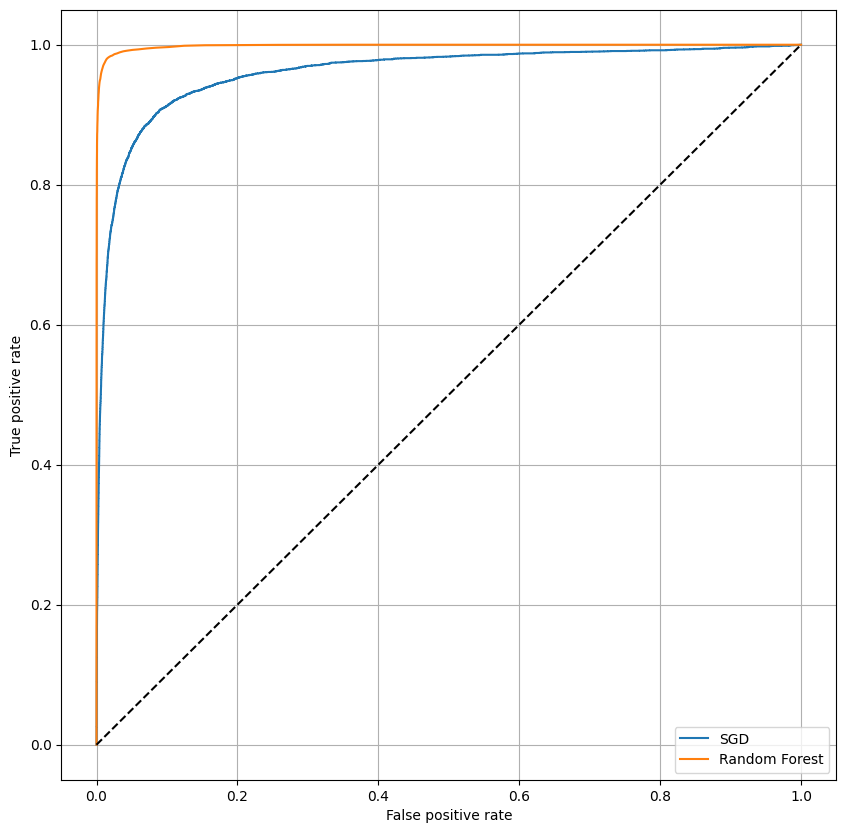

In [42]:
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, label='SGD')
plt.plot(fpr_forest, tpr_forest, label='Random Forest')
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Classificação Multiclasse

In [43]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train, y_train)
svm_clf.predict([some_digit])


array([5], dtype=uint8)

In [44]:
svm_clf.decision_function([some_digit])

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])